In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../GSE141834_scRNAseq_rawCounts.txt", sep="\t")
dft = df.T

In [3]:
dft['unique_counts'] = (dft>0).apply(sum, axis=1)
dft['total_counts'] = dft.apply(sum, axis=1)

In [4]:
uniques = {}
totals = {}
HOURS = "00 01 02 04 08 18".split()
for hours in HOURS:
    uniques[hours] = dft.loc[dft.index.str.startswith(f"Dex.{hours}"), 'unique_counts'].values
    totals[hours] = dft.loc[dft.index.str.startswith(f"Dex.{hours}"), 'total_counts'].values

/blaze/hanju/conda/envs/mlabel/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


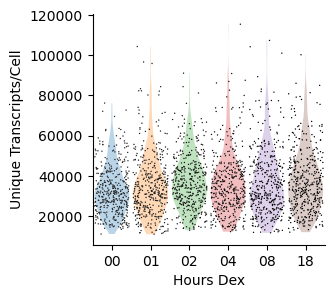

/blaze/hanju/conda/envs/mlabel/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


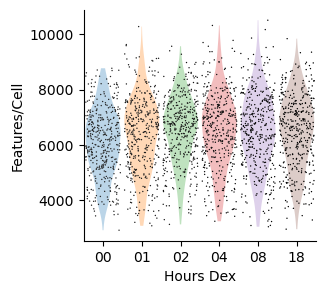

In [5]:
total_data = [totals[hours] for hours in HOURS]
total_swarm = [totals[hours][::1] for hours in HOURS]
unique_data = [uniques[hours] for hours in HOURS]
unique_swarm = [uniques[hours][::1] for hours in HOURS]

plt.figure(figsize=(3, 3))
for i, d in enumerate(total_data):
    plt.violinplot(d, [i], widths=[0.9], showextrema=False, points=100)
sns.stripplot(total_data, s=1, color="black", jitter=.45)
plt.xticks(range(6), HOURS)
plt.xlabel("Hours Dex")
plt.ylabel("Unique Transcripts/Cell")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

plt.figure(figsize=(3, 3))
for i, d in enumerate(unique_data):
    plt.violinplot(d, [i], widths=[0.9], showextrema=False, points=100)
sns.stripplot(unique_data, s=1, color="black", jitter=.45)
plt.xticks(range(6), HOURS)
plt.xlabel("Hours Dex")
plt.ylabel("Features/Cell")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()